<a href="https://colab.research.google.com/github/delibae/AI_study/blob/main/CNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Main

(187, 64, 64, 3)
(187,)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_25 (Conv2D)             (None, 64, 64, 64)   256         ['input_4[0][0]']                
                                                                                                  
 conv2d_22 (Conv2D)             (None, 64, 64, 64)   256         ['input_4[0][0]']                
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 64, 64, 3)   0           ['input_4[0][0]']                
                                                                    

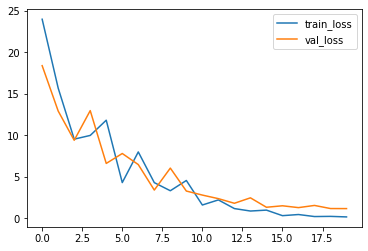

In [37]:
# 데이터 경로 설정
folder_path = '/content/drive/MyDrive/AI_3/real_data_test database'

# 데이터 불러오기.
import glob
import PIL
import numpy as np
from sklearn.model_selection import train_test_split

# 남자, 승기 구분 프로그램을 위한 폴더이름 적어놓기.
folders = ['man', 'seunggi']

# 리스트 하나 만들어놔야지.
x_data = []
y_data = []
label = 0

# 각각의 개체 files에 저장.
for folder in folders:
  files = glob.glob(folder_path + '/' + folder + '/*')
# 파일 이름들에 대해 열어서,
  for file_path in files:
    img = PIL.Image.open(file_path)
    img = img.convert('RGB')  # 흑백 사진도 처리 가능하게 rgb 단위로. + pixel 64 * 64
    img = img.resize((64, 64))
    np_image = np.array(img)
    x_data.append(np_image) # 승기든 남자든 numpy 행렬 데이터 넣자.
    y_data.append(label) # label (구분기준) 넣어놓자.
  label += 1 # 승기 다 끝나고, 남자 구분기준으로 바꾸는 작업.

x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

# 20퍼만 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
x_train, x_test = x_train/255, x_test/255

from tensorflow.keras import layers
import tensorflow as tf

with tf.device('/device:GPU:0'):

  # 32 * 32 픽셀 그림 channel = 3
  input_img = layers.Input(shape = (64,64,3))
  tower_1 = layers.Conv2D(64, (1,1), padding = 'same', activation = 'relu')(input_img)

  tower_2 = layers.Conv2D(64, (1,1), padding = 'same', activation = 'relu')(input_img)
  tower_2 = layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(tower_2)

  tower_3 = layers.MaxPooling2D((3,3), padding = 'same', strides = (1,1)) (input_img)
  tower_3 = layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(tower_3)

  tower_4 = layers.Conv2D(64, (1,1), padding = 'same', activation = 'relu')(input_img)
  tower_4 = layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(tower_4)
  tower_4 = layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu')(tower_4)

  # axis에서 x축 = 1, y축 = 2, z축 = 3.
  concat_layer = layers.concatenate([tower_1, tower_2, tower_3, tower_4], axis = 3)
  flat_layer = layers.Flatten()(concat_layer)
  output = layers.Dense(2, activation = 'softmax')(flat_layer)
  model = tf.keras.models.Model(input_img, output)
  model.summary()

  # sparse = data 전처리 (행렬화)
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  # batch size 가 커질수록, 연산(이 case에서는 200000개의 parameter) 후 가져오는 parameter의 개수 = batch size기 때문에, 메모리에서 그 parameter를 가져오는 과정에서 메모리가 터질 수 있음. (batch size가 클수록.)
  history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20, batch_size = 100)

  import matplotlib
  # 학습하면 학습할수록, train_loss는 감소, 하지만, val_loss 는 다시 증가(overfitting 발생)
  matplotlib.pyplot.plot(history.history['loss'], label = 'train_loss')
  matplotlib.pyplot.plot(history.history['val_loss'], label = 'val_loss')
  matplotlib.pyplot.legend()

#test

In [43]:
import glob
import PIL
import numpy as np
from sklearn.model_selection import train_test_split


folder_path = '/content/drive/MyDrive/AI_3'

test_data = []
folders = ['test']
# 각각의 개체 files에 저장.
for folder in folders:
  files = glob.glob(folder_path + '/' + folder + '/*')
# 파일 이름들에 대해 열어서,
  for file_path in files:
    img = PIL.Image.open(file_path)
    img = img.convert('RGB')  # 흑백 사진도 처리 가능하게 rgb 단위로. + pixel 64 * 64
    img = img.resize((64, 64))
    np_image = np.array(img)
    test_data.append(np_image) # 승기든 남자든 numpy 행렬 데이터 넣자.


In [44]:
# print(model.predict(np.array([test_data[0]])))

for t in test_data:
  print(model.predict(np.array([t])))

1/1 [==============================] - 0s 17ms/step
[[1. 0.]]
